In [89]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.swarm import Swarm
from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage
from IPython.core.display import display, HTML

import pandas as pd
import numpy as np
import scipy
import pprint

In [91]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

In [92]:
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
pp = pprint.PrettyPrinter(indent=4)


## View EXO data

In [93]:
exo_list = storage.exo_list()

In [94]:
pp.pprint(exo_list)

[   'ES_BullishCollarBW',
    'ES_BearishCollarBW',
    'ES_CallSpread',
    'ES_PutSpread',
    'ES_ContFut',
    'ZS_BullishCollarBW',
    'ZS_BearishCollarBW',
    'ZS_CallSpread',
    'ZS_PutSpread',
    'ZS_ContFut',
    'CL_BullishCollarBW',
    'CL_BearishCollarBW',
    'CL_CallSpread',
    'CL_PutSpread',
    'CL_ContFut',
    'ZW_BullishCollarBW',
    'ZW_BearishCollarBW',
    'ZW_CallSpread',
    'ZW_PutSpread',
    'ZW_ContFut',
    'ZN_BullishCollarBW',
    'ZN_BearishCollarBW',
    'ZN_CallSpread',
    'ZN_PutSpread',
    'ZN_ContFut',
    'NG_BullishCollarBW',
    'NG_BearishCollarBW',
    'NG_CallSpread',
    'NG_PutSpread',
    'NG_ContFut',
    'ZC_BullishCollarBW',
    'ZC_BearishCollarBW',
    'ZC_CallSpread',
    'ZC_PutSpread',
    'ZC_ContFut',
    'CL_SMART_Ichimoku_Long',
    'ES_SMART_Ichimoku_Long',
    'NG_SMART_Ichimoku_Long',
    'ZC_SMART_Ichimoku_Long',
    'ZS_SMART_Ichimoku_Long',
    'ZW_SMART_Ichimoku_Long',
    'ZN_SMART_Ichimoku_Long']


### View single EXO

In [110]:
exo_series, exo_dict = storage.load_series('NG_SMART_Ichimoku_Long')

In [111]:
# Exo meta-information
pp.pprint(exo_dict)

{   'margin': 0,
    'name': 'NG_SMART_Ichimoku_Long',
    'pcf': [],
    'pcfqty': [],
    'underlying': ''}


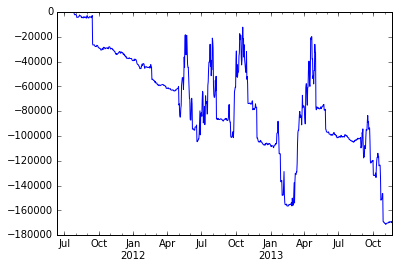

In [112]:
exo_series['exo'].plot()

### Save EXO data to CSVs

In [10]:
links = ''
if not os.path.exists('export'):
    os.mkdir('export')
if not os.path.exists(os.path.join('export', 'exo')):
    os.mkdir(os.path.join('export', 'exo'))
    
for exo_name in sorted(exo_list):
    exo_series, exo_dict = storage.load_series(exo_name)
    exo_series['exo'].to_csv(os.path.join('export', 'exo', exo_name+'.csv'))    
    links += '<a href="export/exo/{0}.csv" target="_blank">{0}</a><br>'.format(exo_name)

display(HTML('<h3>EXO list available for downloading</h3>'))
display(HTML(links))

# Alpha export

### List of available products in Mongo

In [11]:
swm_info = storage.swarms_info()
pp.pprint(swm_info)

{   '_id': None,
    'alphas': [   'RenkoPatternsNoExits',
                  'SwingPoint',
                  'EXO',
                  'PointAndFigure',
                  'IchimokuCloud',
                  'MACross',
                  'BolllingerBands'],
    'exo_types': [   'CallSpread',
                     'PutSpread',
                     'ContFut',
                     'BullishCollarBW',
                     'BearishCollarBW'],
    'instruments': ['ZC', 'NG', 'ZN', 'ES', 'ZS', 'CL', 'ZW']}


### Getting swarm using filter

In [12]:
instruments_filter = ['*']  # Select ALL
#instruments_filter = ['ES', 'CL']

exo_filter = ['*'] # Select ALL
exo_filter = ['BullishCollar']

direction_filter = [0, -1, 1] # Select ALL
direction_filter = [1]

alpha_filter = ['*']  # Select ALL
#alpha_filter = ['MaCross', 'PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

## Swarms loaded

In [13]:
[print(s) for s in sorted(swmdf.columns)];

CL_BullishCollarBW_Long_EXO
ES_BullishCollarBW_Long_EXO
NG_BullishCollarBW_Long_EXO
ZC_BullishCollarBW_Long_EXO
ZN_BullishCollarBW_Long_EXO
ZS_BullishCollarBW_Long_EXO
ZW_BullishCollarBW_Long_EXO


### Saving swarm equities (picked_equity lines)

In [14]:


links = ''
if not os.path.exists('export'):
    os.mkdir('export')
if not os.path.exists(os.path.join('export', 'swarms')):
    os.mkdir(os.path.join('export', 'swarms'))
    
for swm_name in sorted(sorted(swmdf.columns)):
    
    swmdf[swm_name].to_csv(os.path.join('export', 'swarms', swm_name+'.csv'))    
    
    links += '<a href="export/swarms/{0}.csv" target="_blank">{0}</a><br>'.format(swm_name)

display(HTML('<h3>Swarms list available for downloading</h3>'))
display(HTML(links))

# Add all files to the ZIP archive

In [15]:
import shutil
shutil.make_archive('export', 'zip', 'export');
display(HTML('<a href="export.zip" target="_blank">Download all files (.zip archive)</a>'))